In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clr_rf = RandomForestClassifier()

In [2]:
parametrs = {'n_estimators':[10,20,30],
             'criterion' : ['gini','entropy'],
             'max_depth' : [i for i in range(5,20,5)]}

In [3]:
grid_search_cv = GridSearchCV(clr_rf,parametrs,cv = 5)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("train.csv.xls", sep = ',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df = df.fillna(0)
x = df.drop(['PassengerId','Ticket', 'Survived','Name','Cabin'],axis = 1)
x = pd.get_dummies(x)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,0,1
888,3,0.0,1,2,23.4500,1,0,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,0,1,0,0


In [6]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state= 50)

In [8]:
X_train.shape

(623, 11)

In [9]:
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [10, 20, 30]})

In [10]:
best_random_forest = grid_search_cv.best_estimator_

In [11]:
best_random_forest.fit(X_train,y_train)
best_random_forest.score(X_test,y_test)

0.8134328358208955

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import pair_confusion_matrix

precision_score(y_test,best_random_forest.predict(X_test), average= 'micro')

0.8134328358208955

In [13]:
from sklearn.metrics import recall_score
recall_score(y_test,best_random_forest.predict(X_test), average= 'micro')



0.8134328358208955

In [14]:
best_random_forest.feature_importances_

feature_importance = pd.DataFrame({'featured':list(X_train),
                                            'feature_importance':best_random_forest.feature_importances_})

feature_importance.sort_values(by = 'feature_importance',ascending=False)

,featured,feature_importance
4,Fare,0.248502
1,Age,0.183846
6,Sex_male,0.177482
5,Sex_female,0.157637
0,Pclass,0.101004
2,SibSp,0.048546
3,Parch,0.043510
10,Embarked_S,0.016360
8,Embarked_C,0.013995
9,Embarked_Q,0.008874


<AxesSubplot:xlabel='feature_importance', ylabel='featured'>

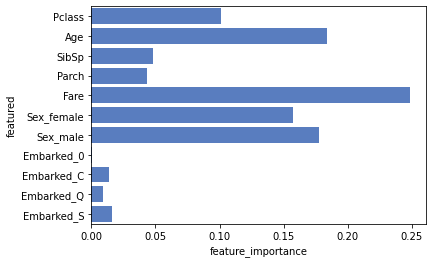

In [15]:
import seaborn as sns
sns.set_color_codes("muted")
sns.barplot(x="feature_importance", y="featured", data=feature_importance,
            label="importance", color="b")